# ⚛ **Mental Health care Chatbot**



In [1]:
from google.colab import files
files.upload()  # Upload the downloaded `kaggle.json`

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"omarkhaleds","key":"6410aa773aa8bbd9b5c58504638f62ae"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

In [3]:
!kaggle datasets download -d atharvjairath/empathetic-dialogues-facebook-ai
!unzip -q empathetic-dialogues-facebook-ai.zip


Dataset URL: https://www.kaggle.com/datasets/atharvjairath/empathetic-dialogues-facebook-ai
License(s): CC-BY-NC-SA-4.0


In [4]:
! kaggle datasets download -d thanakomsn/glove6b300dtxt
! unzip -q glove6b300dtxt.zip

Dataset URL: https://www.kaggle.com/datasets/thanakomsn/glove6b300dtxt
License(s): DbCL-1.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import plotly.express as px
import plotly.graph_objects as go
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('/content/emotion-emotion_69k.csv')

In [3]:
df.head()

,Unnamed: 0,Situation,emotion,empathetic_dialogues,labels,Unnamed: 5,Unnamed: 6
0,0,I remember going to the fireworks with my best...,sentimental,Customer :I remember going to see the firework...,"Was this a friend you were in love with, or ju...",NaN,NaN
1,1,I remember going to the fireworks with my best...,sentimental,Customer :This was a best friend. I miss her.\...,Where has she gone?,NaN,NaN
2,2,I remember going to the fireworks with my best...,sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of...,NaN,NaN
3,3,I remember going to the fireworks with my best...,sentimental,Customer :Was this a friend you were in love w...,This was a best friend. I miss her.,NaN,NaN
4,4,I remember going to the fireworks with my best...,sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64636 entries, 0 to 64635
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            64636 non-null  int64 
 1   Situation             64636 non-null  object
 2   emotion               64632 non-null  object
 3   empathetic_dialogues  64636 non-null  object
 4   labels                64636 non-null  object
 5   Unnamed: 5            113 non-null    object
 6   Unnamed: 6            5 non-null      object
dtypes: int64(1), object(6)
memory usage: 3.5+ MB


#Data prepossing

In [5]:
df.drop(columns=['Unnamed: 0','Unnamed: 5','Unnamed: 6'],inplace=True)

In [6]:
df.head()

,Situation,emotion,empathetic_dialogues,labels
0,I remember going to the fireworks with my best...,sentimental,Customer :I remember going to see the firework...,"Was this a friend you were in love with, or ju..."
1,I remember going to the fireworks with my best...,sentimental,Customer :This was a best friend. I miss her.\...,Where has she gone?
2,I remember going to the fireworks with my best...,sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of...
3,I remember going to the fireworks with my best...,sentimental,Customer :Was this a friend you were in love w...,This was a best friend. I miss her.
4,I remember going to the fireworks with my best...,sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.


In [7]:
df.isnull().sum()

,0
Situation,0
emotion,4
empathetic_dialogues,0
labels,0


In [8]:
df.dropna(subset=['emotion'],inplace=True)

In [9]:
df.isnull().sum()

,0
Situation,0
emotion,0
empathetic_dialogues,0
labels,0


In [10]:
df.duplicated().sum()

np.int64(8)

In [11]:
df[df.duplicated()]


,Situation,emotion,empathetic_dialogues,labels
32383,"I cannot wait for the newest Pokemon game, it ...",anticipating,Customer :I cannot wait for the newest Pokemon...,Those games do seem fun
32463,"I am upset with Nintendo recently, they have n...",disappointed,Customer :What do you mean?\nAgent :,You said they didn't have a direct in a while ...
44502,"I am excited for the next football season, the...",excited,Customer :I am excited for the next football s...,Are you a big Eagles fan?
45912,My father in law's operation next week. I have...,faithful,Customer :My father in law's heart surgery is ...,"Oh, that must be stressful. Do you think he is..."
46878,I think I can get everything I need to get acc...,confident,Customer :What all do you have to get done?\nA...,Lots of cleaning. Cleaning out the garage and ...
48441,i knew i shouldnt have trusted my brother with...,trusting,Customer :i knew i shouldnt have trusted my br...,What happened?
50481,i knew i shouldnt have trusted my brother with...,trusting,Customer :i knew i shouldnt have trusted my br...,What happened?
51055,i knew i shouldnt have trusted my brother with...,trusting,Customer :What happened?\nAgent :,my dog ran away


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64624 non-null  object
 1   emotion               64624 non-null  object
 2   empathetic_dialogues  64624 non-null  object
 3   labels                64624 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [15]:
df.shape

(64624, 4)

In [16]:
df['emotion'] = df['emotion'].astype('category')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Situation             64624 non-null  object  
 1   emotion               64624 non-null  category
 2   empathetic_dialogues  64624 non-null  object  
 3   labels                64624 non-null  object  
dtypes: category(1), object(3)
memory usage: 2.0+ MB


In [18]:
df['emotion'].value_counts()

,count
emotion,
surprised,3295
excited,2464
angry,2296
proud,2247
sad,2213
annoyed,2213
lonely,2106
afraid,2094
grateful,2091


In [19]:
df['emotion'].unique()

['sentimental', 'afraid', 'proud', 'faithful', 'terrified', ..., 't believe my daughter taught herself how to p..., 't think I wold like super heroes', 'm so mad with my brother. He stole from me an..., ' but what I didn't know was that he was worki..., '(']
Length: 43
Categories (43, object): [' I really killed it!', ' a boy.  I hear all these different labor sto...,
                          ' but what I didn't know was that he was worki..., ' time to jump on the motorcycle and go cruisi..., ...,
                          't even like scary things', 't think I wold like super heroes', 'terrified',
                          'trusting']

In [20]:
df['emotion'].nunique()

43

In [21]:
df[df['emotion'] == 't believe my daughter taught herself how to play the ukelele. I was amazed']

,Situation,emotion,empathetic_dialogues,labels
35867,I can,t believe my daughter taught herself how to pl...,impressed,Customer :MY daughter taught herself to play t...
35868,I can,t believe my daughter taught herself how to pl...,impressed,Customer :she is 13. I was really impressed\nA...
35869,I can,t believe my daughter taught herself how to pl...,impressed,Customer :I should pat myself on the back lol\...
35870,I can,t believe my daughter taught herself how to pl...,impressed,"Customer :Wow that is impressive, how old is s..."
35871,I can,t believe my daughter taught herself how to pl...,impressed,"Customer :That is impressive, congrats on rais..."


In [22]:
df[df['emotion'] == '(']

,Situation,emotion,empathetic_dialogues,labels
64217,My dog died right after my cat died.,(,sad,Customer :My puppy died right after my cat.\nA...
64218,My dog died right after my cat died.,(,sad,"Customer :It is horrible, i dont know what to ..."
64219,My dog died right after my cat died.,(,sad,Customer :Sorry to hear that. You must be goin...


In [23]:
df[df['emotion'].str.split().str.len() == 1]['emotion'].value_counts()

,count
emotion,
surprised,3295
excited,2464
angry,2296
proud,2247
sad,2213
annoyed,2213
lonely,2106
afraid,2094
grateful,2091


In [24]:
df = df[df['emotion'].str.split().str.len() == 1].copy()

In [25]:
df = df[df['emotion'] != '(']


In [26]:
df['emotion'].value_counts()

,count
emotion,
surprised,3295
excited,2464
angry,2296
proud,2247
sad,2213
annoyed,2213
lonely,2106
afraid,2094
grateful,2091


In [27]:
df = df[df['emotion'].notnull()].copy()



In [28]:
df['emotion'] = df['emotion'].astype(str)


In [29]:
df = df[df['emotion'].isin(df['emotion'].value_counts()[df['emotion'].value_counts() > 0].index)]

In [30]:
df['emotion'].value_counts()


,count
emotion,
surprised,3295
excited,2464
angry,2296
proud,2247
annoyed,2213
sad,2213
lonely,2106
afraid,2094
grateful,2091


In [31]:
df['emotion'].nunique()

32

In [32]:
df.shape

(64583, 4)

In [33]:
df.sample(10)

,Situation,emotion,empathetic_dialogues,labels
59097,My husband and I decided to get another dog. I...,apprehensive,Customer :Haha why is that? Do you already hav...,"We have 2 dogs already, but they are older. Hi..."
3177,I regret my last boyfriend. I hate to even tel...,ashamed,Customer :He is just annoying and never keeps ...,promises are very important. builds trust. Ult...
63225,I put in an application for a new home and I a...,hopeful,Customer :I'm not sure but I have searched eve...,I hope everything goes great and you get your ...
1372,I am afraid of the upcoming economic crisis in...,afraid,Customer :I almost don't want to talk about it...,yes. I am saving all i can for when the storm ...
57384,I had to get my tag renewed last week as well ...,prepared,Customer :That's so stressful.\nAgent :,It was but I found everything I needed before ...
61190,Going on vacation to florida soon. Can't wait.,anticipating,Customer :That's a loaded statement.. Can you ...,The family and I are going on a vacation to Fl...
20097,I was pretty happy when I graduated high schoo...,joyful,Customer :It really was\nAgent :,Do you have fond memories of school or were yo...
7480,My boss wants me to babysit his daughter.,apprehensive,Customer :I think it might cross some professi...,I understand where you're coming from. I would...
3739,I haven't made a home cooked meal in a while. ...,ashamed,Customer :Well it gets really hot in the kitch...,"Don't feel bad, I have those days, too. I keep..."
13654,I have lived in the same area my entire life a...,content,Customer :What do you do?\nAgent :,I work at a bank in a small town.


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64583 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64583 non-null  object
 1   emotion               64583 non-null  object
 2   empathetic_dialogues  64583 non-null  object
 3   labels                64583 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


# Exploratory Data Analysis

In [ ]:

emotion_counts = df['emotion'].value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=emotion_counts.index,
    y=emotion_counts.values,
    marker=dict(color=emotion_counts.values, colorscale='Plasma')
))

fig.update_layout(
    title='Emotion Distribution',
    xaxis_title='Emotion',
    yaxis_title='Frequency',
    xaxis=dict(tickangle=-45),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white')
)

fig.show()


In [ ]:
# 🔥 Recommended Color Scales for a Dark Background
# ✅ "Plasma" – High contrast, yellow-to-purple
# ✅ "Viridis" – Green-to-yellow gradient
# ✅ "Inferno" – Dark red to bright yellow
# ✅ "Magma" – Deep purple to orange
# ✅ "Cividis" – Blueish to yellow

In [ ]:
df['text_length'] = df['Situation'].astype(str).apply(len)
fig = px.box(df, x='emotion', y='text_length',
             title="Text Length Distribution per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Text Length'},
             color='emotion',
             template='plotly_dark')

fig.update_layout(xaxis_tickangle=-45)
fig.show()


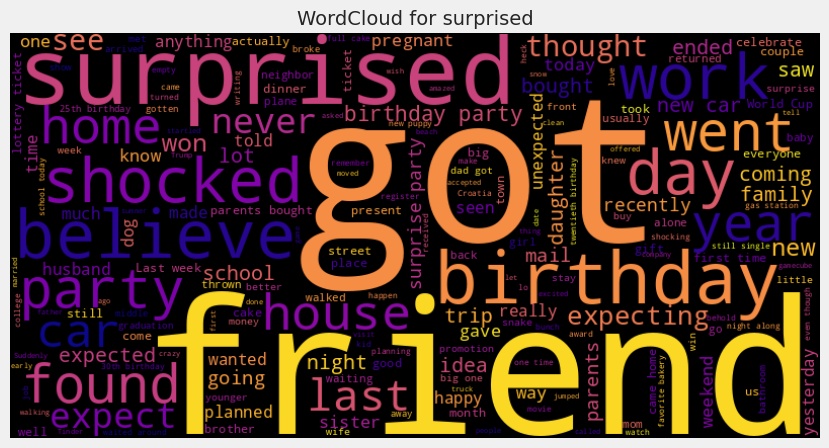

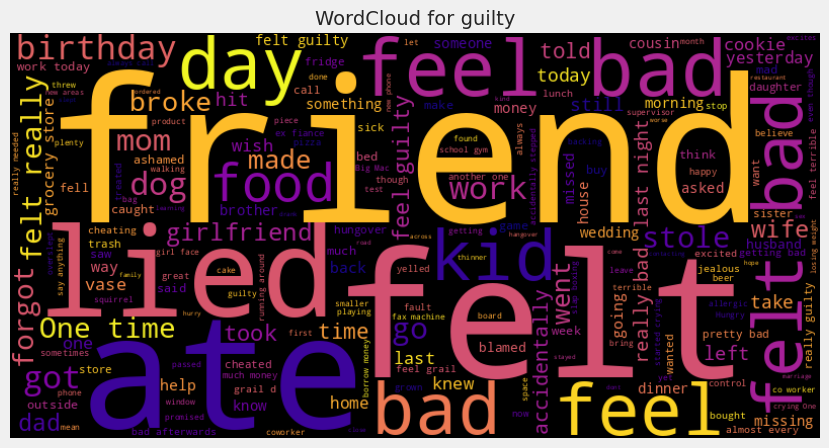

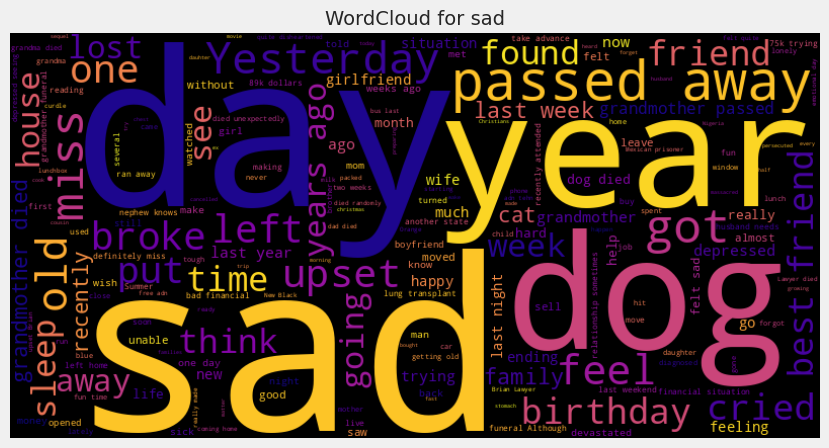

In [ ]:
def plot_wordcloud(emotion):
    text = " ".join(df[df['emotion'] == emotion]['Situation'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {emotion}", fontsize=14)
    plt.show()

for emo in df['emotion'].value_counts().index[:3]:
    plot_wordcloud(emo)


In [ ]:
emotion_text_length = df.groupby('emotion')['text_length'].mean().reset_index().sort_values(by='text_length')

fig = px.bar(emotion_text_length, x='emotion', y='text_length',
             title="Average Text Length per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Average Text Length'},
             color='text_length',
             color_continuous_scale='Inferno',
             template='plotly_dark')


fig.update_layout(xaxis_tickangle=-45)
fig.show()


#Emotion detectoin Model

In [ ]:
label_encoder = LabelEncoder()
df['emotion_label'] = label_encoder.fit_transform(df['emotion'])
df.sample(5)

,Situation,emotion,empathetic_dialogues,labels,text_length,emotion_label
53421,When I was a kid I threw a rock at a boy. It h...,ashamed,Customer :Oh no! Did you get in trouble?\nAgent :,It's hard to believe but I didn't. I honestly ...,119,6
61927,i thought someone was breaking into my apartme...,terrified,Customer :did you call the police? or did you ...,well i heard a noise at the window..when i loo...,59,30
54013,I was ashamed when I decided to drop out of sc...,ashamed,"Customer :Did you hear the ""You'll be a ditch-...",How did you guess? I was told a lot of things ...,50,6
38197,I had to put my dog to sleep yesterday. I am ...,sad,Customer :I am hurting so bad right now.\nAgent :,Time will heal. Remember you dog for all the g...,71,27
56757,My brother was addicted to drugs for ten years...,proud,Customer :Have you ever had a family member ev...,Sometimes I'm worried that I'm that family mem...,187,26


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Situation'], df['emotion_label'], test_size=0.2, random_state=42)

In [ ]:

max_len = int(np.percentile(X_train.apply(len), 95))

print(f"Optimal max_len: {max_len}")


Optimal max_len: 185


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1
max_len = 185

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)

model.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test),
          epochs=10, batch_size=32, callbacks=[early_stopping])


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



1615/1615 ━━━━━━━━━━━━━━━━━━━━ 759s 467ms/step - accuracy: 0.2009 - loss: 2.7967 - val_accuracy: 0.5246 - val_loss: 1.5793
Epoch 2/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 827s 483ms/step - accuracy: 0.6094 - loss: 1.2773 - val_accuracy: 0.6693 - val_loss: 1.0912
Epoch 3/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 805s 485ms/step - accuracy: 0.7556 - loss: 0.7992 - val_accuracy: 0.7503 - val_loss: 0.8383
Epoch 4/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 753s 466ms/step - accuracy: 0.8307 - loss: 0.5557 - val_accuracy: 0.8120 - val_loss: 0.6481
Epoch 5/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 789s 489ms/step - accuracy: 0.8800 - loss: 0.3962 - val_accuracy: 0.8606 - val_loss: 0.5065
Epoch 6/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 815s 497ms/step - accuracy: 0.9120 - loss: 0.2853 - val_accuracy: 0.8785 - val_loss: 0.4427
Epoch 7/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 766s 474ms/step - accuracy: 0.9348 - loss: 0.2133 - val_accuracy: 0.9058 - val_loss: 0.3714
Epoch 8/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 804s 475ms/step - accuracy: 0.9

In [ ]:
df.sample(3)

,Situation,emotion,empathetic_dialogues,labels,text_length,emotion_label
12208,My friend got promoted at work but I did not. ...,jealous,Customer :That is disappointing. Is there oth...,I really like here. I just wish it was me that...,96,21
53579,I am always satisfied with whatever i have,content,Customer :Why is that?\nAgent :,I like to manage whatever i have,42,9
18997,Such a quiet and relaxing Sunday. So calm and...,content,Customer :thats good.. any plans\nAgent :,nothing but just relaxation,59,9


In [ ]:
df['Situation'][62456]

"I went to Hershey park this summer with the kids. I rode a roller coaster for the the first time in years. I don't think I have every screamed that loud in my life."

In [ ]:
df['Situation'][4295]

"I can't wait for school to start back. A litlle quieter in the house."

In [ ]:
df['Situation'][23131]

"I've been stressing at work, and my coworker gave me a pair of movie tickets they weren't using."

In [ ]:
def predict_emotion(text):
    seq = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=max_len)
    predicted_label = model.predict(seq).argmax()
    return label_encoder.inverse_transform([predicted_label])[0]

# Example predictions
print(predict_emotion("I went to Hershey park this summer with the kids. I rode a roller coaster for the the first time in years. I don't think I have every screamed that loud in my life."))
print(predict_emotion("I can't wait for school to start back. A litlle quieter in the house."))
print(predict_emotion("I've been stressing at work, and my coworker gave me a pair of movie tickets they weren't using."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
terrified
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
anxious
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
grateful


In [ ]:
model.save("emotion_classifier.keras")

In [ ]:
from tensorflow.keras.models import load_model

# Load the emotion classifier model
emotion_model = load_model('emotion_classifier.keras')

In [ ]:
df.head()

,Situation,emotion,empathetic_dialogues,labels
0,I remember going to the fireworks with my best...,sentimental,Customer :I remember going to see the firework...,"Was this a friend you were in love with, or ju..."
1,I remember going to the fireworks with my best...,sentimental,Customer :This was a best friend. I miss her.\...,Where has she gone?
2,I remember going to the fireworks with my best...,sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of...
3,I remember going to the fireworks with my best...,sentimental,Customer :Was this a friend you were in love w...,This was a best friend. I miss her.
4,I remember going to the fireworks with my best...,sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.


# Chatbot response

In [ ]:
pd.set_option('display.max_colwidth', None)


In [ ]:
df['empathetic_dialogues'].head()


,empathetic_dialogues
0,"Customer :I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.\nAgent :"
1,Customer :This was a best friend. I miss her.\nAgent :
2,Customer :We no longer talk.\nAgent :
3,"Customer :Was this a friend you were in love with, or just a best friend?\nAgent :"
4,Customer :Where has she gone?\nAgent :


In [ ]:
df['labels'].head()

,labels
0,"Was this a friend you were in love with, or just a best friend?"
1,Where has she gone?
2,Oh was this something that happened because of an argument?
3,This was a best friend. I miss her.
4,We no longer talk.


In [ ]:
import re

def clean_text(text):
    text = text.replace("Customer :", "").replace("Agent :", "")  # remove speaker tags
    text = text.replace("\\n", " ").replace("\n", " ")  # replace line breaks
    text = re.sub(r"\s+", " ", text)  # remove extra whitespace
    return text.strip().lower()  # strip and lowercase


In [ ]:
df['empathetic_dialogues_clean'] = df['empathetic_dialogues'].apply(clean_text)

In [ ]:
df['labels_clean'] = df['labels'].apply(clean_text)

In [ ]:
df['empathetic_dialogues_clean'].head()

,empathetic_dialogues_clean
0,"i remember going to see the fireworks with my best friend. it was the first time we ever spent time alone together. although there was a lot of people, we felt like the only people in the world."
1,this was a best friend. i miss her.
2,we no longer talk.
3,"was this a friend you were in love with, or just a best friend?"
4,where has she gone?


In [ ]:
df['labels_clean'].head()

,labels_clean
0,"was this a friend you were in love with, or just a best friend?"
1,where has she gone?
2,oh was this something that happened because of an argument?
3,this was a best friend. i miss her.
4,we no longer talk.


In [ ]:
df['input_text'] = df['empathetic_dialogues_clean'].astype(str)
df['target_text'] = df['labels_clean'].astype(str)


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, MultiHeadAttention, LayerNormalization, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import numpy as np
import re

# --- Preprocessing ---
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.replace("Customer :", "").replace("Agent :", "")
    sentence = re.sub(r"\s+", " ", sentence).strip()
    return sentence

inputs = df['empathetic_dialogues'].apply(preprocess_sentence)
targets = df['labels'].apply(preprocess_sentence)

START_TOKEN = '<start>'
END_TOKEN = '<end>'
inputs = [f"{START_TOKEN} {text} {END_TOKEN}" for text in inputs]
targets = [f"{START_TOKEN} {text} {END_TOKEN}" for text in targets]

# --- Tokenization ---
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer.fit_on_texts(inputs + targets)
VOCAB_SIZE = len(tokenizer.word_index) + 1
MAX_LENGTH = 90  # increased max length

input_seqs = tokenizer.texts_to_sequences(inputs)
target_seqs = tokenizer.texts_to_sequences(targets)

input_seqs = tf.keras.preprocessing.sequence.pad_sequences(input_seqs, maxlen=MAX_LENGTH, padding='post')
target_seqs = tf.keras.preprocessing.sequence.pad_sequences(target_seqs, maxlen=MAX_LENGTH, padding='post')

decoder_input_data = target_seqs[:, :-1]
decoder_target_data = target_seqs[:, 1:]
decoder_target_data = np.expand_dims(decoder_target_data, -1)

# --- Split ---
x_train_enc, x_val_enc, x_train_dec, x_val_dec, y_train, y_val = train_test_split(
    input_seqs, decoder_input_data, decoder_target_data, test_size=0.1, random_state=42)

BATCH_SIZE = 64
train_dataset = tf.data.Dataset.from_tensor_slices(((x_train_enc, x_train_dec), y_train)).shuffle(1000).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices(((x_val_enc, x_val_dec), y_val)).batch(BATCH_SIZE)

# --- Load GloVe Embeddings ---
EMBEDDING_DIM = 300
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
with open('/content/glove.6B.300d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.strip().split()
        if len(values) != EMBEDDING_DIM + 1:
            continue
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        if word in tokenizer.word_index:
            idx = tokenizer.word_index[word]
            embedding_matrix[idx] = coefs

# --- Model Architecture ---
LSTM_UNITS = 512
DROPOUT_RATE = 0.3  # reduced for better learning

# Encoder
enc_inputs = Input(shape=(None,), name="encoder_inputs")
enc_emb = Embedding(VOCAB_SIZE, EMBEDDING_DIM, weights=[embedding_matrix], trainable=True)(enc_inputs)
enc_emb = LayerNormalization()(enc_emb)
enc_emb = Dropout(DROPOUT_RATE)(enc_emb)

enc_lstm = Bidirectional(LSTM(LSTM_UNITS, return_sequences=True, return_state=True,
                              dropout=DROPOUT_RATE, recurrent_dropout=0.1))
enc_out, f_h, f_c, b_h, b_c = enc_lstm(enc_emb)
state_h = Concatenate()([f_h, b_h])
state_c = Concatenate()([f_c, b_c])

# Decoder
dec_inputs = Input(shape=(None,), name="decoder_inputs")
dec_emb = Embedding(VOCAB_SIZE, EMBEDDING_DIM, weights=[embedding_matrix], trainable=True)(dec_inputs)
dec_emb = LayerNormalization()(dec_emb)
dec_emb = Dropout(DROPOUT_RATE)(dec_emb)

dec_lstm = LSTM(LSTM_UNITS * 2, return_sequences=True, return_state=True,
                dropout=DROPOUT_RATE, recurrent_dropout=0.1)
dec_out, _, _ = dec_lstm(dec_emb, initial_state=[state_h, state_c])

# Multi-Head Attention
attention = MultiHeadAttention(num_heads=8, key_dim=LSTM_UNITS)(dec_out, enc_out)
attention = Dropout(DROPOUT_RATE)(attention)
attention = LayerNormalization()(attention)
dec_context = Concatenate(axis=-1)([attention, dec_out])

# Residual Feedforward + Output
residual = Dense(512, activation="relu", kernel_regularizer=l2(0.005))(dec_context)
residual = LayerNormalization()(residual)
residual = Dropout(DROPOUT_RATE)(residual)

final_output = Dense(VOCAB_SIZE, activation="softmax")(residual)

# Model
model = Model([enc_inputs, dec_inputs], final_output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Callbacks ---
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
checkpoint_callback = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# --- Train ---
model.fit(train_dataset,
          validation_data=val_dataset,
          epochs=10,  # reduced number of epochs
          callbacks=[checkpoint_callback, early_stop, lr_reduce])


Epoch 1/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 1326s 1s/step - accuracy: 0.8387 - loss: 1.9362 - val_accuracy: 0.8658 - val_loss: 0.7652 - learning_rate: 7.0000e-04
Epoch 2/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 1341s 1s/step - accuracy: 0.8656 - loss: 0.7676 - val_accuracy: 0.8691 - val_loss: 0.7334 - learning_rate: 7.0000e-04
Epoch 3/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 1338s 1s/step - accuracy: 0.8686 - loss: 0.7337 - val_accuracy: 0.8709 - val_loss: 0.7219 - learning_rate: 7.0000e-04
Epoch 4/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 1332s 1s/step - accuracy: 0.8704 - loss: 0.7142 - val_accuracy: 0.8719 - val_loss: 0.7156 - learning_rate: 7.0000e-04
Epoch 5/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 1328s 1s/step - accuracy: 0.8715 - loss: 0.6994 - val_accuracy: 0.8729 - val_loss: 0.7087 - learning_rate: 7.0000e-04
Epoch 6/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 1343s 1s/step - accuracy: 0.8724 - loss: 0.6871 - val_accuracy: 0.8734 - val_loss: 0.7078 - learning_rate: 7.0000e-04
Epoch 7/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 1289s 1s/ste

In [38]:
model.save('chatbot_response.keras')

In [39]:
model.save('chatbot_response.h5')

In [51]:
import pickle

# Save tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [40]:
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [41]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('chatbot_response.keras', compile=False)


In [42]:
def decode_sequence(input_text, tokenizer, model, max_len=90):
    # Preprocess and tokenize the input
    input_text = preprocess_sentence(input_text)
    input_seq = tokenizer.texts_to_sequences([f"<start> {input_text} <end>"])
    input_seq = pad_sequences(input_seq, maxlen=max_len, padding='post')

    # Decoder input starts with <start> token
    decoder_input = tokenizer.texts_to_sequences(["<start>"])[0]
    decoder_input = tf.expand_dims(decoder_input, 0)

    result = []

    for _ in range(max_len):
        predictions = model.predict([input_seq, decoder_input], verbose=0)
        predicted_id = tf.argmax(predictions[0, -1, :]).numpy()

        # Convert ID to word
        for word, index in tokenizer.word_index.items():
            if index == predicted_id:
                predicted_word = word
                break

        if predicted_word == "<end>" or predicted_word is None:
            break

        result.append(predicted_word)

        # Append the predicted_id to the decoder input
        decoder_input = tf.concat([decoder_input, [[predicted_id]]], axis=-1)

    return ' '.join(result)


In [53]:
test_input = "i am very sad today"
response = decode_sequence(test_input, tokenizer, model)
print("User:", test_input)
print("Bot:", response)


User: i am very sad today
Bot: i m sorry to hear that . i hope you can find a new job .
